#Part C – Programming Task

A* search on maze


In [ ]:

import heapq
import matplotlib.pyplot as plt
import numpy as np


def manhattan(a, b):
    return abs(a[0]-b[0]) + abs(a[1]-b[1])

def reconstruct_path(came_from, current):
    path = [current]
    while current in came_from:
        current = came_from[current]
        path.append(current)
    path.reverse()
    return path

def get_neighbors(pos, maze):
    r, c = pos
    neighbors = []
    moves = [(1,0), (-1,0), (0,1), (0,-1)]
    for dr, dc in moves:
        nr, nc = r+dr, c+dc
        if 0<=nr<len(maze) and 0<=nc<len(maze[0]) and maze[nr][nc]!=1:
            neighbors.append((nr,nc))
    return neighbors

1. Implement A* search on a maze (given as a 2D matrix where 1=wall, 0=path, A=start,
B=goal).

In [ ]:

def astar(maze, start, goal, heuristic):
    open_heap = []
    counter = 0
    g_score = {start:0}
    f_score = {start: heuristic(start,goal)}
    came_from = {}
    heapq.heappush(open_heap,(f_score[start], counter, start))
    closed = set()

    while open_heap:
        _, _, current = heapq.heappop(open_heap)
        if current == goal:
            return reconstruct_path(came_from,current), g_score[current]
        closed.add(current)
        for neighbor in get_neighbors(current, maze):
            tentative_g = g_score[current]+1
            if tentative_g < g_score.get(neighbor,float('inf')):
                came_from[neighbor]=current
                g_score[neighbor]=tentative_g
                f_score[neighbor]=tentative_g+heuristic(neighbor,goal)
                counter+=1
                heapq.heappush(open_heap,(f_score[neighbor],counter,neighbor))
    return None,float('inf')

- Visualize the path found.

In [ ]:

def visualize_maze(maze, path=None):
    cmap = plt.cm.get_cmap('gray_r')
    maze_array = np.array([[1 if cell==1 else 0 for cell in row] for row in maze])
    plt.imshow(maze_array,cmap=cmap)
    for r in range(len(maze)):
        for c in range(len(maze[0])):
            if maze[r][c]=='A':
                plt.text(c,r,'A',ha='center',va='center',color='green',fontsize=12,weight='bold')
            elif maze[r][c]=='B':
                plt.text(c,r,'B',ha='center',va='center',color='red',fontsize=12,weight='bold')
    if path:
        pr, pc = zip(*path)
        plt.plot(pc, pr, color='blue', linewidth=2)
    plt.gca().invert_yaxis()
    plt.show()

In [ ]:

maze = [
    [0,0,0,0,0],
    [1,1,0,1,0],
    ['A',0,0,1,'B'],
    [0,1,0,0,0],
    [0,0,0,1,0]
]
start=None
goal=None
for r in range(len(maze)):
    for c in range(len(maze[0])):
        if maze[r][c]=='A':
            start=(r,c)
            maze[r][c]=0
        elif maze[r][c]=='B':
            goal=(r,c)
            maze[r][c]=0
print('Start:',start,'Goal:',goal)

Start: (2, 0) Goal: (2, 4)


Case 1: Manhattan
Path: [(2, 0), (2, 1), (2, 2), (3, 2), (3, 3), (3, 4), (2, 4)]
Cost: 6


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19208\2708274670.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('gray_r')


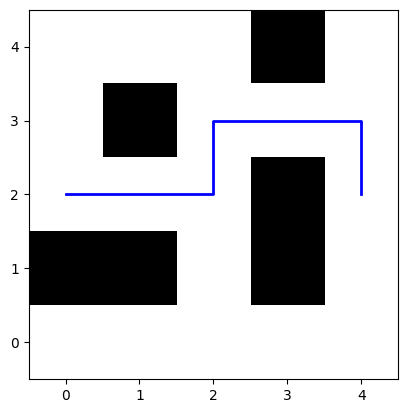

In [5]:
path,cost=astar(maze,start,goal,manhattan)
print('Case 1: Manhattan')
print('Path:',path)
print('Cost:',cost)
visualize_maze(maze,path)


2. Modify the heuristic:


- Case 1: Multiply Manhattan distance by 1.5

Case 2: Manhattan * 1.5
Path: [(2, 0), (2, 1), (2, 2), (3, 2), (3, 3), (3, 4), (2, 4)]
Cost: 6


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19208\2708274670.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('gray_r')


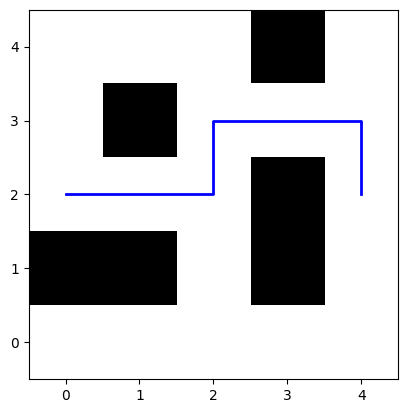

In [6]:
def heuristic_scaled(a,b):
    return 1.5*manhattan(a,b)
path,cost=astar(maze,start,goal,heuristic_scaled)
print('Case 2: Manhattan * 1.5')
print('Path:',path)
print('Cost:',cost)
visualize_maze(maze,path)

- Case 2: Define heuristic so that for one edge it violates consistency.

Case 3: Inconsistent Heuristic
Path: [(2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (3, 2), (3, 3), (3, 4), (2, 4)]
Cost: 8


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19208\2708274670.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('gray_r')


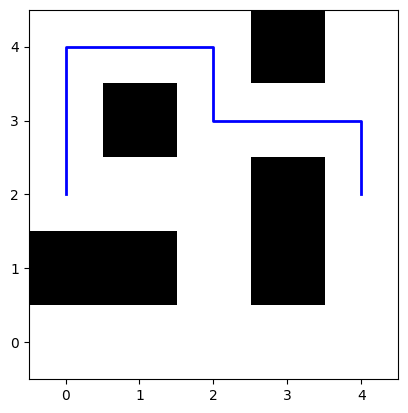

In [7]:
def heuristic_inconsistent(a,b):
    h_val = manhattan(a,b)
    if a==(2,1):
        return h_val+5
    return h_val
path,cost=astar(maze,start,goal,heuristic_inconsistent)
print('Case 3: Inconsistent Heuristic')
print('Path:',path)
print('Cost:',cost)
visualize_maze(maze,path)